In [1]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.dates as mdates

In [95]:
import numpy as np

In [ ]:
from IPython.display import Image

In [133]:
fs = 14

In [134]:
plt.rc("font",size=fs)

# i/o

In [31]:
main_path = "/glade/scratch/doubrawa/post_processing/"

In [32]:
hfx  = {}
rmol = {}

In [33]:
days = [20,21,28,29,30]

In [34]:
for day in days:
    
    hfx[day]  = {}
    rmol[day] = {}
    
    day_files = sorted(glob.glob(os.path.join(main_path,"WRF_LES_25m_SPATIAL_AVERAGED_2D_2015-03-{0}*".format(day))))
    for f in day_files:
        datetime_str = os.path.split(f)[-1].split('_2D_')[-1].split('.csv')[0]
        datetime_pd  = pd.to_datetime(datetime_str,format="%Y-%m-%d_%H:%M:%S").tz_localize('UTC')
        vals         = pd.read_csv(f,index_col=[0],header=None)

        hfx[day][datetime_pd]  = vals.loc['HFX'].values[0]
        rmol[day][datetime_pd] = vals.loc['RMOL'].values[0]    

    hfx[day]  = pd.Series(hfx[day])
    rmol[day] = pd.Series(rmol[day])

# plot

In [50]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

In [59]:
start = pd.Timestamp('20180606')

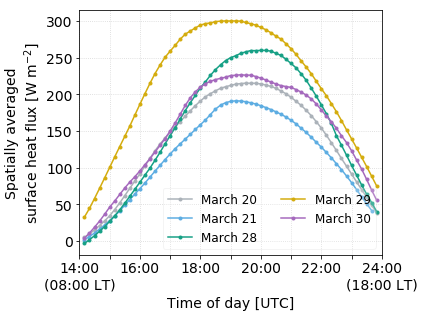

In [135]:
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)

for day in days:
    

    deltas = hfx[day].index-hfx[day].index[0]+pd.Timedelta('14h')
    index  = start+deltas
    
    ax.plot(index[1:],
            hfx[day].values[1:],color=colors_days[day],marker='.',label='March {0}'.format(day))

xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])
ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

ax.set_ylabel("Spatially averaged\nsurface heat flux [W m$^{{-2}}$]")#\n $\langle  \rangle")

lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
fig.subplots_adjust(left=0.2,bottom=0.2)
fig.savefig("/glade/u/home/doubrawa/figs/hfx_diurnal_cycles.png",dpi=300)

In [132]:
# Image(filename='test.png') 

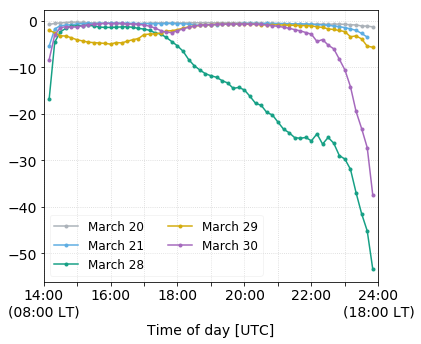

In [136]:
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)

for day in days:
    

    deltas = rmol[day].index-rmol[day].index[0]+pd.Timedelta('14h')
    index  = start+deltas
    
    ax.plot(index[1:],
            1/rmol[day].values[1:],color=colors_days[day],marker='.',label='March {0}'.format(day))

xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])
ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

# ax.set_ylabel("Spatially averaged\nsurface heat flux [W m$^{{-2}}$]")#\n $\langle  \rangle")

lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)